In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_data import get_merged_data, get_skills_key, load_green_category, load_soc_key
from skill_annotation import map_skills_to_green_type
joint_data = get_merged_data()
green_jobs = load_green_category()
skills_key = get_skills_key()
soc_key = load_soc_key()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'figure.figsize':(11.7,8.27)})
sns.set_palette("Greens")

### Composition of Green Jobs
- Composition of higher-level SOC groups by green category

### Composition of Green Skills
- Composition of Lightcast vacancy higher-level skill groups by green category
- Relative frequency of Lightcast vacancy skills by green category

### Location of Green Jobs
- Relative frequency of Lightcast regional vacancies by green category

### Plots

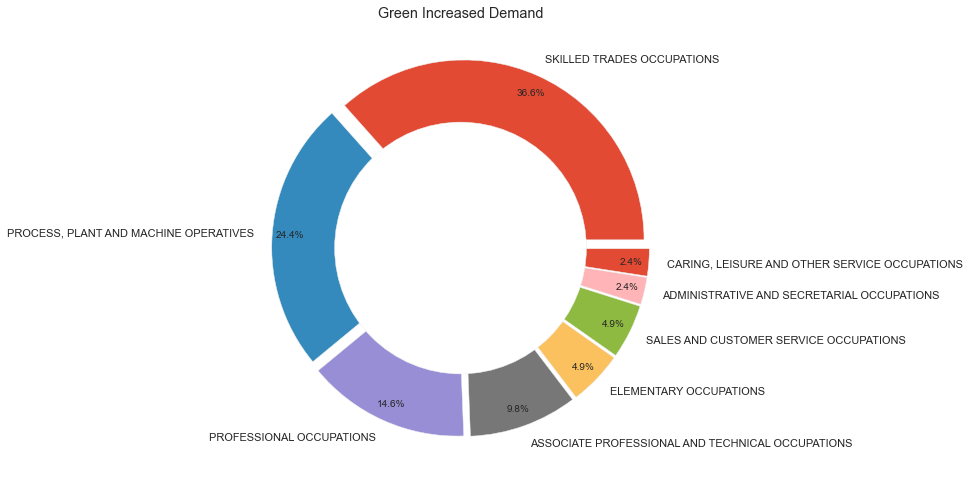

In [140]:
# Check composition of green vs non-green jobs
data = soc_key.merge(green_jobs, left_on="Unit Group", right_on="SOC2010 4-digit", how="left")
data["Green Category"] = data["Green Category"].fillna("Not Green")

data = data.groupby('Green Category')["Major Group"].value_counts(normalize = True)
data = data.to_frame(name="Percent").reset_index()
data = data[data["Green Category"] == "Green Increased Demand"]

plt.style.use('ggplot')
plt.pie(data["Percent"], labels = data["Major Group"], autopct='%1.1f%%',
        pctdistance=0.90, explode = tuple(0.05 for _ in range(len(data))))
# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Add circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Green Increased Demand')
plt.show()

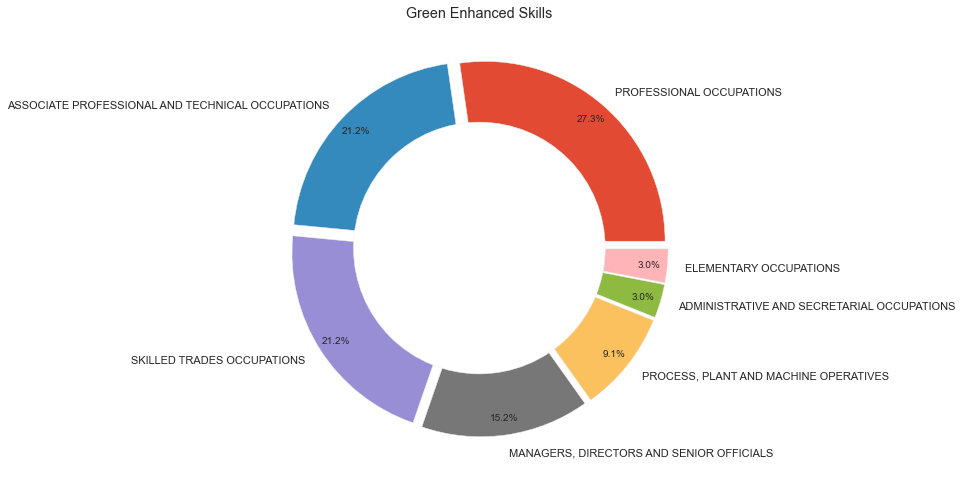

In [139]:
# Check composition of green vs non-green jobs
data = soc_key.merge(green_jobs, left_on="Unit Group", right_on="SOC2010 4-digit", how="left")
data["Green Category"] = data["Green Category"].fillna("Not Green")

data = data.groupby('Green Category')["Major Group"].value_counts(normalize = True)
data = data.to_frame(name="Percent").reset_index()
data = data[data["Green Category"] == "Green Enhanced Skills"]

plt.style.use('ggplot')
plt.pie(data["Percent"], labels = data["Major Group"], autopct='%1.1f%%',
        pctdistance=0.90, explode = tuple(0.05 for _ in range(len(data))))
# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Add circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Green Enhanced Skills')
plt.show()

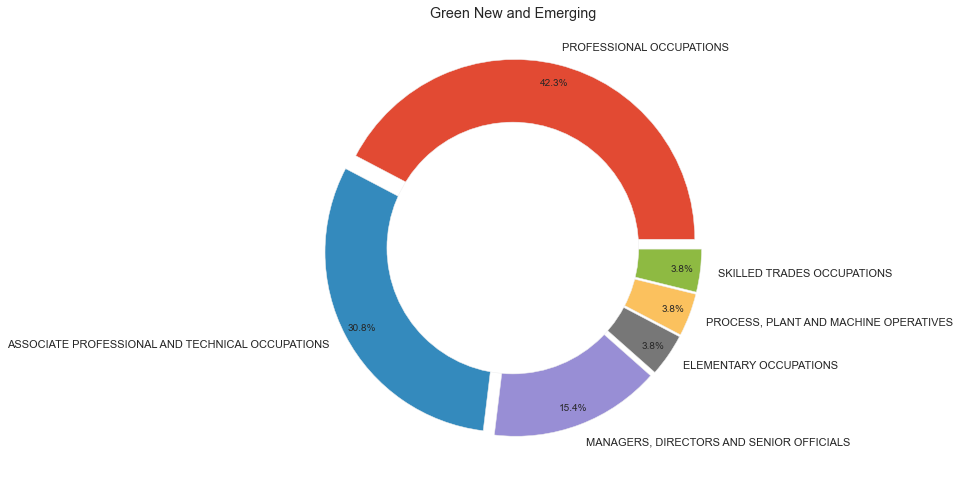

In [141]:
# Check composition of green vs non-green jobs
data = soc_key.merge(green_jobs, left_on="Unit Group", right_on="SOC2010 4-digit", how="left")
data["Green Category"] = data["Green Category"].fillna("Not Green")

data = data.groupby('Green Category')["Major Group"].value_counts(normalize = True)
data = data.to_frame(name="Percent").reset_index()
data = data[data["Green Category"] == "Green New and Emerging"]

plt.style.use('ggplot')
plt.pie(data["Percent"], labels = data["Major Group"], autopct='%1.1f%%',
        pctdistance=0.90, explode = tuple(0.05 for _ in range(len(data))))
# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Add circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Green New and Emerging')
plt.show()

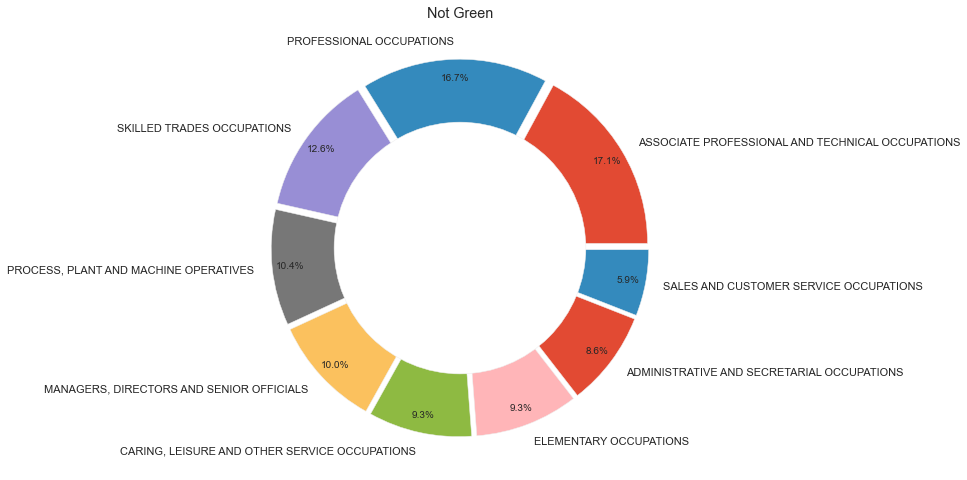

In [142]:
# Check composition of green vs non-green jobs
data = soc_key.merge(green_jobs, left_on="Unit Group", right_on="SOC2010 4-digit", how="left")
data["Green Category"] = data["Green Category"].fillna("Not Green")

data = data.groupby('Green Category')["Major Group"].value_counts(normalize = True)
data = data.to_frame(name="Percent").reset_index()
data = data[data["Green Category"] == "Not Green"]

plt.style.use('ggplot')
plt.pie(data["Percent"], labels = data["Major Group"], autopct='%1.1f%%',
        pctdistance=0.90, explode = tuple(0.05 for _ in range(len(data))))
# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Add circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Not Green')
plt.show()

<AxesSubplot:xlabel='percentage', ylabel='Green Category'>

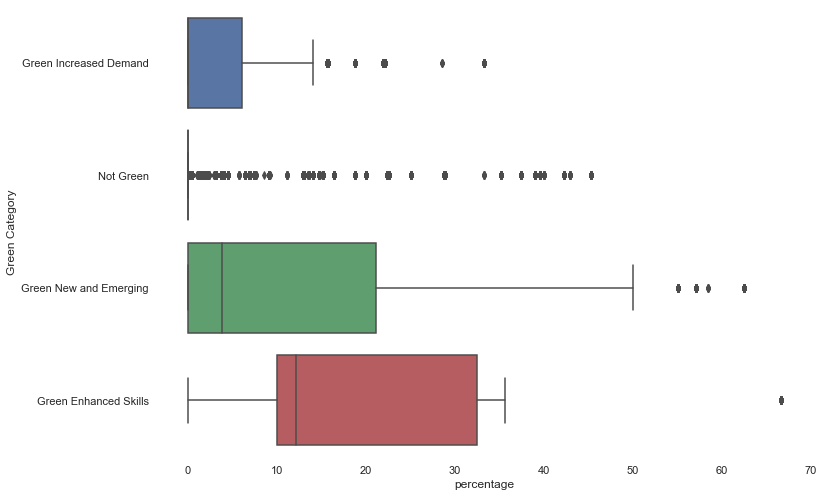

In [42]:
# Plot percentage of time spent on green tasks by green job category
sns.boxplot(y = joint_data["Green Category"].fillna("Not Green"),
            x = joint_data["percentage"])

<AxesSubplot:xlabel='Percent', ylabel='Major Group'>

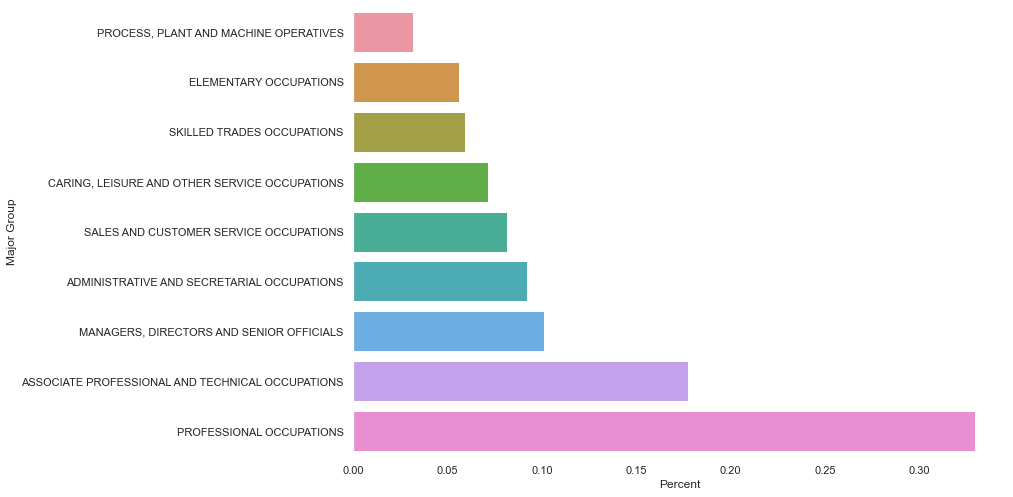

In [59]:
# Check which jobs are represented in Lightcast data
lightcast_counts = joint_data['SOC_4'].value_counts().to_frame().reset_index(level=0).rename(
    columns = {"index":"Unit Group", "SOC_4":"Count"})

counts = soc_key.merge(lightcast_counts, on="Unit Group", how="left")

data = counts.sort_values("Count", ascending=True).groupby('Major Group').sum()[["Count"]].reset_index()
data["Percent"] = data["Count"] / sum(data["Count"])


sns.barplot(data=data.sort_values("Count"), y="Major Group", x="Percent")

<AxesSubplot:xlabel='Percent', ylabel='Sub-Major Group'>

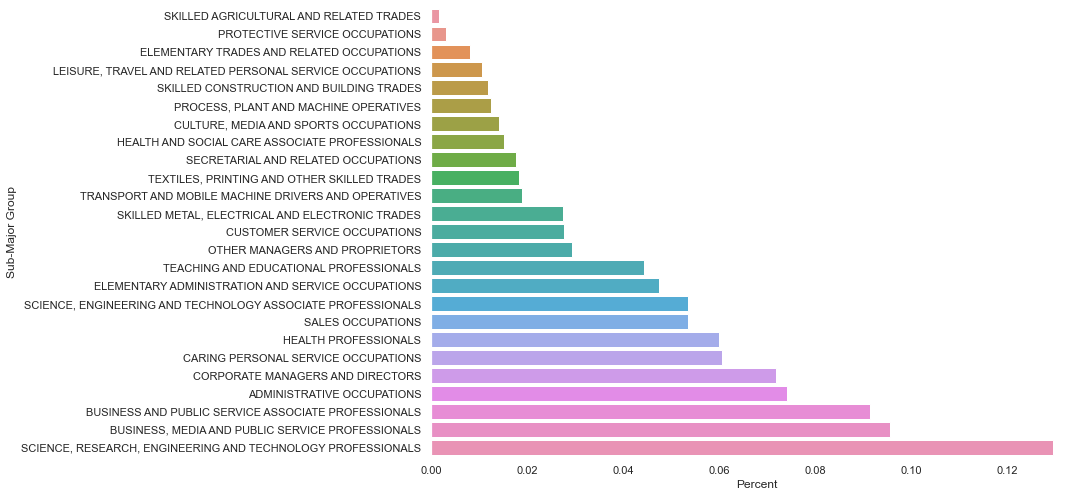

In [52]:
# Check which jobs are represented in Lightcast data
lightcast_counts = joint_data['SOC_4'].value_counts().to_frame().reset_index(level=0).rename(
    columns = {"index":"Unit Group", "SOC_4":"Count"})

counts = soc_key.merge(lightcast_counts, on="Unit Group", how="left")

data = counts.sort_values("Count", ascending=True).groupby('Sub-Major Group').sum()[["Count"]].reset_index()
data["Percent"] = data["Count"] / sum(data["Count"])
sns.barplot(data=data.sort_values("Count"), y="Sub-Major Group", x="Percent")